# Patch Analyzer

We will use this to gather all patches info

In [97]:
tools = [
    'Elysium', 
    'sGuard', 
    'sGuardPlus',
    'SmartFix', 
    'SmartShield', 
    "SolGPT" ,
    'TIPS', 
]

In [98]:
Columns=['Patch','Original','Category','Tool','DIFF','COMP', 'Detected','Fixed','Consistent','sanity_check','mitigates','patch_link', 'original_link', 'diff_link', 'exploit_link']

In [99]:
import os

#collecting contracts name
dataset='smartbugs/data_analysis/'
results_path='../results/'
contracts_path=os.path.join(results_path,dataset,'contracts.csv')
storage_path=os.path.join(results_path,dataset)

import pandas as pd
contracts_df = pd.read_csv(contracts_path)

import pandas as pd
result_df = pd.DataFrame([], columns=Columns)

In [100]:
vulnerabilities=contracts_df["Category"].unique().tolist()
contract_names=contracts_df["Name"].unique().tolist()

In [101]:
result_df

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,Consistent,sanity_check,mitigates,patch_link,original_link,diff_link,exploit_link


In [102]:
import re
def get_contract(input_string):
    parts = input_string.split('/')
    return parts[-2]  

def get_category(text):
    folders = os.path.normpath(text).split(os.sep)
    
    # Check each folder against the predefined category list
    for folder in folders:
        if folder in vulnerabilities:
            return folder
    return "unknown" 
def get_patch(input_string):
    parts = input_string.split('/')
    return parts[-1]

In [103]:
#test

def test_n_patches(result_df):
    assert len(result_df[result_df['Tool'] == 'Elysium'].values.tolist()) == 121
    assert len(result_df[result_df['Tool'] == 'SmartShield'].values.tolist()) == 135
    assert len(result_df[result_df['Tool'] == 'sGuard'].values.tolist()) == 109
    assert len(result_df[result_df['Tool'] == 'sGuardPlus'].values.tolist()) == 81
    assert len(result_df[result_df['Tool'] == 'SmartFix'].values.tolist()) == 86
    assert len(result_df[result_df['Tool'] == 'TIPS'].values.tolist()) == 242
    assert len(result_df[result_df['Tool'] == 'SolGPT'].values.tolist()) == 552
def test_dataset(result_df):
    assert len(result_df['Original'].unique()) == 141
    assert len(result_df['Category'].unique()) ==10
    assert len(result_df['Tool'].unique()) == 7

def test_diff_patches(result_df):
    assert len(result_df[(result_df['Tool'] == 'Elysium') & (result_df['DIFF'] == True)]) == 95
    assert len(result_df[(result_df['Tool'] == 'SmartShield') & (result_df['DIFF'] == True)]) == 135
    assert len(result_df[(result_df['Tool'] == 'sGuard') & (result_df['DIFF'] == True)]) == 62
    assert len(result_df[(result_df['Tool'] == 'sGuardPlus') & (result_df['DIFF'] == True)]) == 81
    assert len(result_df[(result_df['Tool'] == 'SmartFix') & (result_df['DIFF'] == True)]) == 86
    assert len(result_df[(result_df['Tool'] == 'TIPS') & (result_df['DIFF'] == True)]) == 242
    assert len(result_df[(result_df['Tool'] == 'SolGPT') & (result_df['DIFF'] == True)]) == 552
def test_compilable_patches(result_df):
    assert len(result_df[(result_df['Tool'] == 'Elysium') & (result_df['COMP'] == True)]) == 0  # Elysium does not have compilable data
    assert len(result_df[(result_df['Tool'] == 'SmartShield') & (result_df['COMP'] == True)]) == 0  # Smartshield does not have compilable data
    assert len(result_df[(result_df['Tool'] == 'sGuard') & (result_df['COMP'] == True)]) == 108
    assert len(result_df[(result_df['Tool'] == 'sGuardPlus') & (result_df['COMP'] == True)]) == 81
    assert len(result_df[(result_df['Tool'] == 'SmartFix') & (result_df['COMP'] == True)]) == 86
    assert len(result_df[(result_df['Tool'] == 'TIPS') & (result_df['COMP'] == True)]) == 234
    assert len(result_df[(result_df['Tool'] == 'SolGPT') & (result_df['COMP'] == True)]) == 527

def test_valid_patches(result_df):
    assert len(result_df[(result_df['Tool'] == 'Elysium') & (result_df['Valid Patches'] == True)]) == 101  # Elysium does not have compilable patches
    assert len(result_df[(result_df['Tool'] == 'SmartShield') & (result_df['Valid Patches'] == True)]) == 131  # Smartshield does not have compilable patches
    assert len(result_df[(result_df['Tool'] == 'sGuard') & (result_df['Valid Patches'] == True)]) == 61
    assert len(result_df[(result_df['Tool'] == 'sGuardPlus') & (result_df['Valid Patches'] == True)]) == 81
    assert len(result_df[(result_df['Tool'] == 'SmartFix') & (result_df['Valid Patches'] == True)]) == 86
    assert len(result_df[(result_df['Tool'] == 'TIPS') & (result_df['Valid Patches'] == True)]) == 234
    assert len(result_df[(result_df['Tool'] == 'SolGPT') & (result_df['Valid Patches'] == True)]) == 527




In [104]:
def read_diff(tools, result_df):
    for tool in tools:
        tool_diff_file='../results/smartbugs/'+tool+'/patches_diff.csv'
        df_diff=pd.read_csv(tool_diff_file, names=['Patch', 'Original','DIFF'], skiprows=1)
        if tool in ['SolGPT']:
            df_diff=pd.read_csv(tool_diff_file, names=['Patch', 'Original','cleaned','DIFF'], skiprows=1)
        values=df_diff.values.tolist()
        for line in values:
            category= get_category(line[0])
            patch = get_patch(line[0])
            original= get_contract(line[0])+ '.sol'
            diff= line[-1]
            patch_link= 'https://github.com/ASSERT-KTH/RepairComp/blob/main/results/smartbugs/'+tool+'/'+line[0]
            original_link='https://github.com/smartbugs/smartbugs-curated/tree/main/dataset/'+category+'/'+original
            diff_link= 'https://github.com/ASSERT-KTH/RepairComp/blob/main/results/smartbugs/'+tool+'/'+line[0] .replace('.sol', '.diff')
            if tool in ['Elysium', 'SmartShield']:
                patch=patch[:-7]+'.bin'
                diff_link="n/a"
            new_row = {'Patch': patch, 'Category': category, 'Original': original, 'Tool':tool, 'DIFF': diff,'patch_link':patch_link, 'original_link':original_link, 'diff_link': diff_link}
            result_df = pd.concat([result_df, pd.DataFrame([new_row])], ignore_index=True)
    return result_df
                   


In [105]:
def read_comp(tools,result_df):
    for tool in tools:
        tool_comp_file='../results/smartbugs/'+tool+'/compilation_results_0.4.24.csv'
        df_comp=pd.read_csv(tool_comp_file, names=['Patch', 'COMP'], skiprows=1)
        values=df_comp.values.tolist()
        for line in values:
            category= get_category(line[0])
            patch = get_patch(line[0])
            original= get_contract(line[0])+ '.sol'
            comp= line[-1]
            if comp == 0:
                comp = True
            else :
                comp = False
            mask = (result_df['Patch'] == patch) & (result_df['Category'] == category) & (result_df['Tool'] == tool)
            if mask.any():
                result_df.loc[mask, 'COMP'] = comp
    return result_df
    

In [106]:
def read_d_f_m(tools,result_df):
    for tool in tools:
        tool_dfm_file='../results/smartbugs/'+tool+'/patches_evaluation.csv'
        df_dfm=pd.read_csv(tool_dfm_file, names=['Patch', 'Original','Detected', 'Fixed','Maintained'], skiprows=1)
        values=df_dfm.values.tolist()
        for line in values:
            category= get_category(line[1])
            patch = get_patch(line[0])
            original= get_contract(line[0])+ '.sol'
            D= line[-3]
            F=line[-2]
            mask = (result_df['Patch'] == patch) & (result_df['Category'] == category) & (result_df['Tool'] == tool)
            result_df.loc[mask, 'Detected'] = D
            result_df.loc[mask, 'Fixed']= F
            result_df.loc[mask, 'Consistent'] = True if D == F and D>0 else False
    return result_df

In [107]:
#collecting exploits
#from curl to https://github.com/ASSERT-KTH/sb-heists/blob/main/smartbugs-curated/0.4.x/contracts_w_exploits.csv
import requests
import json
from io import StringIO

# Get the raw GitHub content
url = "https://raw.githubusercontent.com/ASSERT-KTH/sb-heists/main/smartbugs-curated/0.4.x/contracts_w_exploits.csv"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read the CSV content from the response
    csv_content = StringIO(response.text)
    
    # Load the file paths
    exploits = pd.read_csv(csv_content, header=None, names=['file_path'])
    
    # Split the file_path into category and name
    exploits[['category', 'name']] = exploits['file_path'].str.split('/', n=1, expand=True)
    
    # Display the first few rows to verify
    print(f"Total files: {len(exploits)}")
    
    # Get a count of files by category
    print("\nFiles per category:")
    print(exploits['category'].value_counts())
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

def mark_no_exploit_contracts(result_df, exploits_df):
    """
    Mark contracts with no associated exploit by setting sanity_check, mitigates and exploit_link to 'NONE'.
    
    Parameters:
    result_df (DataFrame): DataFrame with contracts to be analyzed
    exploits_df (DataFrame): DataFrame containing information about available exploits
    
    Returns:
    DataFrame: Updated DataFrame with NONE values for contracts without exploits
    """
    # Create a set of (category, name) tuples for contracts with exploits
    exploit_pairs = set(zip(exploits_df['category'], exploits_df['name']))
    
    # Create a mask for rows that don't have an exploit
    no_exploit_mask = ~result_df.apply(lambda row: (row['Category'], row['Original']) in exploit_pairs, axis=1)
    
    # Set 'NONE' values for contracts without exploits
    result_df.loc[no_exploit_mask, 'sanity_check'] = 'non-exploitable'
    result_df.loc[no_exploit_mask, 'mitigates'] = 'non-exploitable'
    result_df.loc[no_exploit_mask, 'exploit_link'] = 'non-exploitable'
    
    # Print summary
    print(f"Total contracts without exploits: {no_exploit_mask.sum()}")
    print(f"Total contracts with exploits: {len(result_df) - no_exploit_mask.sum()}")
    
    return result_df


def read_sanity_and_exploits(tools, result_df):

    """
    Read sanity and exploit test results for each tool and update the sanity_check and mitigates columns.
    
    Parameters:
    tools (list): List of tool names to process
    result_df (DataFrame): DataFrame with columns including Category, Tool, sanity_check, mitigates, etc.
    
    Returns:
    DataFrame: Updated DataFrame with sanity_check and mitigates columns filled based on test results
    """

    result_df = mark_no_exploit_contracts(result_df, exploits)
    
    for tool in tools:
        file_path = f'../results/smartbugs/{tool}/results_exploits.json'
        if os.path.exists(file_path):
            print(f"Processing results for tool: {tool}")
            with open(file_path, 'r') as file:
                result_data = json.load(file)
                
                # Create a mapping to store test results by contract file
                contract_results = {}
                
                # Process failed sanity tests
                for test in result_data.get('failedSanityTests', []):
                    contract_file = test.get('contractFile')
                    test_file= test.get('file')

                    if contract_file:
                        contract_results[contract_file] = {'sanity': 'failed', 'exploit': None, 'test_file': test_file}
                
                # Process passed exploit tests
                for test in result_data.get('passedResults', []):
                    contract_file = test.get('contractFile')
                    test_file= test.get('file')
                    if contract_file:
                        if contract_file not in contract_results:
                            contract_results[contract_file] = {'sanity': 'passed', 'exploit': 'passed', 'test_file': test_file}
                        else:
                            contract_results[contract_file]['exploit'] = 'passed'
                
                # Process failed exploit tests
                for test in result_data.get('failedResults', []):
                    contract_file = test.get('contractFile')
                    test_file= test.get('file')
                    if contract_file:
                        if contract_file not in contract_results:
                            contract_results[contract_file] = {'sanity': 'passed', 'exploit': 'failed', 'test_file': test_file}
                        else:
                            contract_results[contract_file]['exploit'] = 'failed'
                
                # Update rows where Tool matches the current tool
                tool_mask = result_df['Tool'] == tool
                
                # Only update rows that don't already have 'non-exploitable' values (skip contracts with no exploits)
                update_mask = tool_mask & (result_df['sanity_check'] != 'non-exploitable')
                
                # Update the DataFrame using vectorized operations where possible
                for idx, row in result_df[update_mask].iterrows():
                    # Construct contract path to match with what's in the test results
                    if tool in ['Elysium', 'SmartShield', 'sGuardPlus']:
                        contract_path = f"{row['Category']}/{row['Original']}"
                    else:
                        contract_path = f"{row['Category']}/{row['Patch']}"
                    result = contract_results.get(contract_path, {})


                    
                    # Update mitigates based on sanity and exploit results
                    sanity = result.get('sanity', 'unknown')
                    exploit = result.get('exploit', 'unknown')
                    
                    # Update sanity_check
                    if sanity == 'passed' or sanity == 'failed':
                         result_df.at[idx, 'sanity_check'] = sanity
                    
                    # Update mitigates based on sanity and exploit results
                    sanity = result.get('sanity', 'unknown')
                    exploit = result.get('exploit', 'unknown')
                    
                    if sanity == 'passed' and exploit == 'failed':
                        result_df.at[idx, 'mitigates'] = 'yes'
                    elif exploit == 'passed':
                        result_df.at[idx, 'mitigates'] = 'no'
                    test_file= result.get('test_file', None)
                    # Update exploit link
                    exploit_link = f"https://github.com/ASSERT-KTH/sb-heists/tree/main/smartbugs-curated/0.4.x/test/{test_file}"
                    result_df.at[idx, 'exploit_link'] = exploit_link


                
                # Print summary for this tool
                print(f"\nSummary for {tool}:")
                tool_rows = result_df[result_df['Tool'] == tool]
                sanity_counts = tool_rows['sanity_check'].value_counts().to_dict()
                mitigates_counts = tool_rows['mitigates'].value_counts().to_dict()
                print(f"Sanity check counts: {sanity_counts}")
                print(f"Mitigates counts: {mitigates_counts}")
        else:
            print(f"Results file not found for tool: {tool}")
    
    return result_df
                
 


Total files: 91

Files per category:
category
reentrancy                   26
unchecked_low_level_calls    20
access_control               16
arithmetic                   13
bad_randomness                4
denial_of_service             4
front_running                 3
time_manipulation             3
other                         2
Name: count, dtype: int64


In [108]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [109]:
result_df=read_diff(tools, result_df)
#result_df['Detected'].fillna(None, inplace=True)
#result_df['Fixed'].fillna(None, inplace=True)

comp_tools=[
    #'Elysium', 
    'sGuard', 
    'sGuardPlus',
    'SmartFix', 
    #'SmartShield', 
    "SolGPT" ,
    'TIPS', 
]
non_comp_tools=[
    'Elysium', 
    'SmartShield'
]
result_df=read_comp(comp_tools, result_df)
result_df['COMP'].fillna("N/A", inplace=True)

result_df=read_d_f_m(tools,result_df)

result_df=read_sanity_and_exploits(tools, result_df)

Total contracts without exploits: 493
Total contracts with exploits: 833
Processing results for tool: Elysium

Summary for Elysium:
Sanity check counts: {'passed': 48, 'non-exploitable': 47, 'failed': 26}
Mitigates counts: {'non-exploitable': 47, 'yes': 29, 'no': 20}
Processing results for tool: sGuard

Summary for sGuard:
Sanity check counts: {'passed': 45, 'non-exploitable': 41, 'failed': 1}
Mitigates counts: {'non-exploitable': 41, 'yes': 30, 'no': 15}
Processing results for tool: sGuardPlus

Summary for sGuardPlus:
Sanity check counts: {'passed': 49, 'non-exploitable': 32}
Mitigates counts: {'yes': 44, 'non-exploitable': 32, 'no': 5}
Processing results for tool: SmartFix

Summary for SmartFix:
Sanity check counts: {'passed': 60, 'non-exploitable': 22, 'failed': 4}
Mitigates counts: {'yes': 48, 'non-exploitable': 22, 'no': 12}
Processing results for tool: SmartShield

Summary for SmartShield:
Sanity check counts: {'passed': 67, 'non-exploitable': 47, 'failed': 21}
Mitigates counts: 

In [110]:
#result_df[result_df['Original'] == '0xf70d589d76eebdd7c12cc5eec99f8f6fa4233b9e.sol']
#result_df['sanity_check'].value_counts()
result_df[(result_df['Tool'] == 'SmartShield') & (result_df['mitigates'] == 'yes')].groupby('Category').size()
#result_df[result_df['Original'] == '0x663e4229142a27f00bafb5d087e1e730648314c3.sol']


Category
access_control               2
arithmetic                   9
front_running                1
reentrancy                   4
time_manipulation            1
unchecked_low_level_calls    9
dtype: int64

In [111]:
#check for missing values, if good nothing should be printed
for tool in tools:
    query= result_df[(result_df['Tool']==tool)& (result_df['Fixed']>0)]
    if len(query.values.tolist()) == 0:
        print(tool)
        print(query)
        print('----------------------')

In [112]:
for tool in tools:
    print(tool)
    assert(len(result_df[(result_df['Tool']==tool)& (result_df['Fixed']>0)].values.tolist()))>0

Elysium
sGuard
sGuardPlus
SmartFix
SmartShield
SolGPT
TIPS


In [113]:
#sanitychecks
test_n_patches(result_df)
test_dataset(result_df)
test_diff_patches(result_df)
test_compilable_patches(result_df)
#test_valid_patches(result_df)

In [114]:
len(result_df[result_df['mitigates'] == 'yes'].values.tolist())

481

In [115]:
result_df[(result_df['Original'] == 'reentrancy_simple.sol') & (result_df['Tool'] == 'Elysium')]

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,Consistent,sanity_check,mitigates,patch_link,original_link,diff_link,exploit_link
60,reentrancy_simple.bin,reentrancy_simple.sol,reentrancy,Elysium,True,N/A,1,1,True,failed,NaN,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,n/a,https://github.com/ASSERT-KTH/sb-heists/tree/m...


In [116]:
result_df[(result_df['Tool'] == 'Elysium') & (result_df['mitigates'] == 'no')].groupby('Category').size()

Category
access_control               4
arithmetic                   1
denial_of_service            3
front_running                2
other                        1
reentrancy                   1
time_manipulation            1
unchecked_low_level_calls    7
dtype: int64

In [117]:
result_df.to_csv(os.path.join(storage_path,'all_patches_stats.csv'), index=True)

# Rest of the notebok is to turn the data per patch into per contract

In [118]:
#result_df[result_df['Original']=='0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol']#duplicate case

In [119]:
def turn_to_per_contract(df,tools,column):
    per_contract=pd.read_csv(contracts_path)
    del per_contract['Occurrences'] 
    del per_contract['Lines'] 
    values=df.values.tolist()
    for tool in tools:
        per_contract[tool]=''
        for line in values:
            line_tool=line[3]
            if line_tool==tool:
                patch=line[0]
                original=line[1]
                category=line[2]
                value=line[list(df.keys()).index(column)]
                find= (per_contract['Name']==original) & (per_contract['Category']==category) 
                if value ==True:
                    per_contract.loc[find, tool] = value
    
    return per_contract
        

In [120]:
def turn_to_per_contract_dfm(df,tools,column):
    per_contract=pd.read_csv(contracts_path)
    del per_contract['Occurrences'] 
    del per_contract['Lines'] 
    values=df.values.tolist()
    for tool in tools:
        per_contract[tool]=''
        for line in values:
            line_tool=line[3]
            if line_tool==tool:
                patch=line[0]
                original=line[1]
                category=line[2]
                value=line[list(df.keys()).index(column)]
                find= (per_contract['Name']==original) & (per_contract['Category']==category) 
                if value>0:
                    bool_value= value>0 #means if fixed,detected, or 
                    per_contract.loc[find, tool] = bool_value
    
    return per_contract

In [121]:
per_c_diff=turn_to_per_contract(result_df,tools,'DIFF')
per_c_diff[per_c_diff==True].count()

Name             0
Category         0
Elysium         95
sGuard          62
sGuardPlus      81
SmartFix        86
SmartShield    135
SolGPT         139
TIPS           140
dtype: int64

In [122]:
per_c_diff[(per_c_diff['Category']=='reentrancy') & (per_c_diff['Elysium']==True)]

,Name,Category,Elysium,sGuard,sGuardPlus,SmartFix,SmartShield,SolGPT,TIPS
59,0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol,reentrancy,True,True,,True,True,True,True
60,0x7541b76cb60f4c60af330c208b0623b7f54bf615.sol,reentrancy,True,True,True,True,True,True,True
73,0xf015c35649c82f5467c9c74b7f28ee67665aad68.sol,reentrancy,True,True,True,True,True,True,True
74,etherbank.sol,reentrancy,True,True,True,True,True,True,True
75,etherstore.sol,reentrancy,True,True,True,True,True,True,True
77,reentrance.sol,reentrancy,True,True,True,True,True,True,True
78,reentrancy_bonus.sol,reentrancy,True,True,True,True,True,True,True
79,reentrancy_cross_function.sol,reentrancy,True,True,True,,True,True,True
80,reentrancy_dao.sol,reentrancy,True,True,True,True,True,True,True
81,reentrancy_insecure.sol,reentrancy,True,True,True,,True,True,True


In [123]:
per_c_comp=turn_to_per_contract(result_df,tools,'COMP')
per_c_comp[per_c_comp==True].count()

Name             0
Category         0
Elysium          0
sGuard         108
sGuardPlus      81
SmartFix        86
SmartShield      0
SolGPT         138
TIPS           138
dtype: int64

In [124]:
#add a column that counts the amout of tools with True value
per_c_comp['count']=per_c_comp[tools].apply(lambda x: x[x==True].count(), axis=1)
per_c_comp[per_c_comp['count']>2].count()

Name           127
Category       127
Elysium        127
sGuard         127
sGuardPlus     127
SmartFix       127
SmartShield    127
SolGPT         127
TIPS           127
count          127
dtype: int64

In [125]:
#per_c_valid=turn_to_per_contract(result_df,tools,'Valid Patches')
#per_c_valid[per_c_valid==True].count()

In [126]:
per_c_d=turn_to_per_contract_dfm(result_df,tools,'Detected')
per_c_d[per_c_d==True].count()

Name            0
Category        0
Elysium        52
sGuard         35
sGuardPlus     70
SmartFix       51
SmartShield    59
SolGPT         97
TIPS           82
dtype: int64

In [127]:
per_c_f=turn_to_per_contract_dfm(result_df,tools,'Fixed')
per_c_f[per_c_f==True].count()

Name            0
Category        0
Elysium        52
sGuard          3
sGuardPlus     70
SmartFix       50
SmartShield    40
SolGPT         89
TIPS           81
dtype: int64

### This moves on into calculating consistency

In [128]:
#result_df[(result_df['Tool']== 'SolGPT') & (result_df['Category']== 'arithmetic') ]
# For getting valid patches
import numpy as np
consistency_df=result_df.copy()
cond1 = result_df['Tool'].isin(comp_tools) & (consistency_df['COMP']==True)& (result_df['DIFF']==True)
cond2 = result_df['Tool'].isin(non_comp_tools) & (consistency_df['DIFF'] ==True)
consistency_df['Valid Patches'] = np.where(cond1 | cond2, True, False)
consistency_df[(consistency_df['Valid Patches']== True) & (consistency_df['Fixed'].isin( [0,1,2,3,4,5,6]) == True)]

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,Consistent,sanity_check,mitigates,patch_link,original_link,diff_link,exploit_link,Valid Patches
0,arbitrary_location_write_simple.bin,arbitrary_location_write_simple.sol,access_control,Elysium,True,N/A,0,0,False,failed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,n/a,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
1,incorrect_constructor_name1.bin,incorrect_constructor_name1.sol,access_control,Elysium,True,N/A,1,1,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,n/a,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
2,incorrect_constructor_name2.bin,incorrect_constructor_name2.sol,access_control,Elysium,True,N/A,1,1,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,n/a,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
3,incorrect_constructor_name3.bin,incorrect_constructor_name3.sol,access_control,Elysium,True,N/A,1,1,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,n/a,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
4,mapping_write.bin,mapping_write.sol,access_control,Elysium,True,N/A,1,1,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,n/a,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,multiowned_vulnerable.sol,multiowned_vulnerable.sol,access_control,TIPS,True,True,0,0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
1322,mapping_write.sol,mapping_write.sol,access_control,TIPS,True,True,0,0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
1323,wallet_03_wrong_constructor.sol,wallet_03_wrong_constructor.sol,access_control,TIPS,True,True,0,0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
1324,mycontract.sol,mycontract.sol,access_control,TIPS,True,True,1,1,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True


In [129]:
consistency_df[(consistency_df['Tool']=='sGuardPlus')& (consistency_df['Detected']>=0)]

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,Consistent,sanity_check,mitigates,patch_link,original_link,diff_link,exploit_link,Valid Patches
230,0xf70d589d76eebdd7c12cc5eec99f8f6fa4233b9e.sol,0xf70d589d76eebdd7c12cc5eec99f8f6fa4233b9e.sol,unchecked_low_level_calls,sGuardPlus,True,True,1,1,True,non-exploitable,non-exploitable,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,non-exploitable,True
231,0x958a8f594101d2c0485a52319f29b2647f2ebc06.sol,0x958a8f594101d2c0485a52319f29b2647f2ebc06.sol,unchecked_low_level_calls,sGuardPlus,True,True,1,1,True,non-exploitable,non-exploitable,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,non-exploitable,True
232,0xf29ebe930a539a60279ace72c707cba851a57707.sol,0xf29ebe930a539a60279ace72c707cba851a57707.sol,unchecked_low_level_calls,sGuardPlus,True,True,1,1,True,non-exploitable,non-exploitable,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,non-exploitable,True
233,0xb11b2fed6c9354f7aa2f658d3b4d7b31d8a13b77.sol,0xb11b2fed6c9354f7aa2f658d3b4d7b31d8a13b77.sol,unchecked_low_level_calls,sGuardPlus,True,True,1,1,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
234,0xe4eabdca81e31d9acbc4af76b30f532b6ed7f3bf.sol,0xe4eabdca81e31d9acbc4af76b30f532b6ed7f3bf.sol,unchecked_low_level_calls,sGuardPlus,True,True,1,1,True,non-exploitable,non-exploitable,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,non-exploitable,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,wallet_02_refund_nosub.sol,wallet_02_refund_nosub.sol,access_control,sGuardPlus,True,True,0,0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
307,simple_suicide.sol,simple_suicide.sol,access_control,sGuardPlus,True,True,1,1,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
308,mapping_write.sol,mapping_write.sol,access_control,sGuardPlus,True,True,0,0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
309,wallet_03_wrong_constructor.sol,wallet_03_wrong_constructor.sol,access_control,sGuardPlus,True,True,0,0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True


In [130]:
#result_df[['Tool','Fixed']].value_counts()
# Calculate the difference between 'Fixed' and 'Detected'
df=consistency_df.copy()
df['Difference'] = df['Detected']- df['Fixed']  

# Filter rows where the difference is zero and group by 'Tool'
equal_counts = df[(df['Difference'] == 0) & (df['Detected'] > 0) ].groupby('Tool').size()
#fix patches
equal_counts

Tool
Elysium         52
SmartFix        48
SmartShield     38
SolGPT         332
TIPS           129
sGuard           2
sGuardPlus      70
dtype: int64

In [131]:
# Filter rows where the difference is zero and group by 'Tool'
#Partially fix patches
partial_counts = df[df['Difference'] > 0].groupby('Tool').size()
partial_counts

Tool
SmartFix        3
SmartShield    21
SolGPT         37
TIPS           43
sGuard         33
dtype: int64

In [132]:
# Filter rows where the difference is zero and group by 'Tool'
introduced_counts = df[df['Difference'] < 0].groupby('Tool').size()
introduced_counts

Series([], dtype: int64)

In [133]:
df['Tool'][(df["Difference"].isin([0,1,2,3,4,5,6,7,8])==False) ].value_counts()

Tool
sGuard     51
Elysium    26
SolGPT     25
TIPS        8
Name: count, dtype: int64

In [134]:
# Get the index of the row with the minimum 'Difference' for each contract
valid_patches_df = df[df['Valid Patches'] == True]
valid_patches_df['Tool'].value_counts()
#selecting the ones with the lowest Differences, yet not checking if it was initially detected.... 
# #but this is not relevant because ti will be the same for all the pacthes! :D Nothing to worry about
best_patches_idx = valid_patches_df.groupby(['Original','Category', 'Tool'])['Difference'].idxmin().dropna()
best_patches_df = valid_patches_df.loc[best_patches_idx].reset_index(drop=True)


In [135]:
for tool in tools:
    assert(len(best_patches_df[(best_patches_df['Tool']==tool)].values.tolist()))>0

In [136]:
detected_df=contracts_df.copy()
detected_df.drop(['Occurrences', 'Lines'], axis=1, inplace=True)
for tool in tools:
    detected_df[tool] = detected_df.apply(
    lambda row: any(
        (best_patches_df['Original'] == row['Name']) & 
        (best_patches_df['Category'] == row['Category']) & 
        (best_patches_df['Tool'] == tool) &
        (best_patches_df['Detected'] > 0)
    ), axis=1
)

In [137]:
#detected_df#['sGuard'].unique() #[detected_df['Detected']==False].count()
detected_df['total']=detected_df[tools].apply(lambda x: x[x==True].count(), axis=1)
#len(detected_df[detected_df['total']==0].values.tolist()) ==24

#detected_df[detected_df['sGuard']==True]
#detected_df.head()

In [138]:
left_list=tools+['No Detection']
df=detected_df
df['No Detection'] = df[left_list[:-1]].apply(lambda row: all(row == False), axis=1)

# Create a dictionary to hold the sets for each tool
tool_sets = {tool: set(df[df[tool] == True].apply(lambda x: (x['Name'], x['Category']), axis=1)) for tool in left_list}

# Prepare the data in a format suitable for the venn package
data = {}
for tool, contract_set in tool_sets.items():
    data[tool] = {f"{contract}-{category}" for contract, category in contract_set}

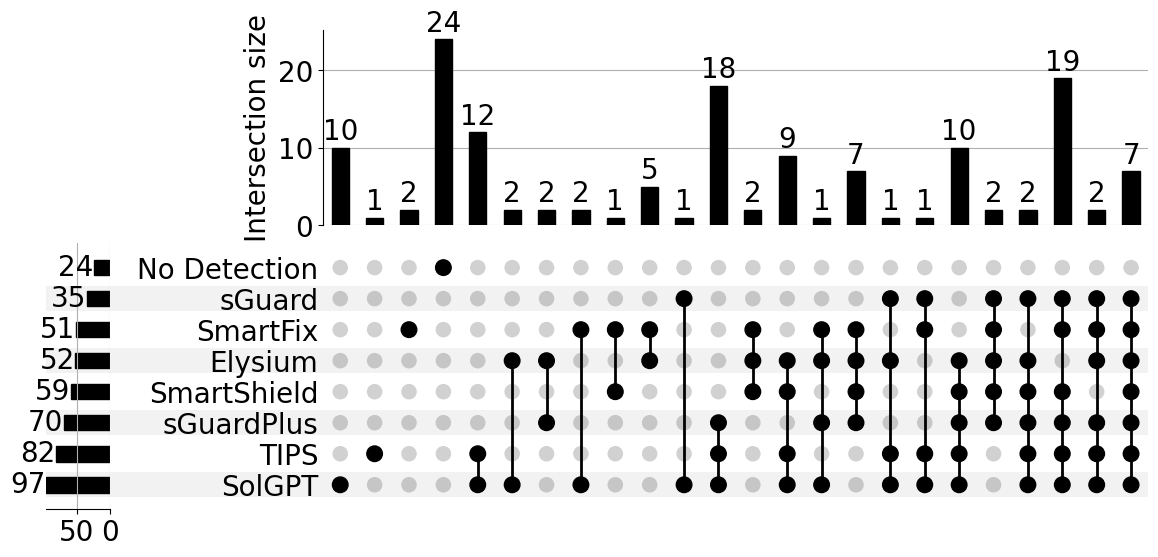

In [139]:

# OVERLAP FOR DETECTION
from matplotlib import pyplot as plt


from upsetplot import from_contents, plot
plot(from_contents(data), show_counts="{:,}")
plt.rc('font', size=20)
plt.savefig(os.path.join(storage_path,'plots/detection_overlap.png'), bbox_inches='tight')

In [140]:
# consistent contracts
#best_patches_df['Tool'][(best_patches_df['Difference']==0) & (best_patches_df['Detected']>0)].value_counts()

#consistent=best_patches_df[(best_patches_df['Difference']==0) & (best_patches_df['Detected']>0)]
consistent=contracts_df.copy()
consistent.drop(['Occurrences', 'Lines'], axis=1, inplace=True)
for tool in tools:
    consistent[tool] = consistent.apply(
    lambda row: any(
        (best_patches_df['Original'] == row['Name']) & 
        (best_patches_df['Category'] == row['Category']) & 
        (best_patches_df['Tool'] == tool) &
        (best_patches_df['Difference'] == 0)&
        (best_patches_df['Detected'] > 0)

    ), axis=1
)
consistent[consistent['sGuard']==True]

consistent.to_csv(os.path.join(storage_path,'consistent_contracts.csv'), index=False)

In [141]:
consistent['Category'][(consistent['SolGPT']==True)].value_counts()

Category
unchecked_low_level_calls    48
reentrancy                   28
access_control                6
other                         3
bad_randomness                3
Name: count, dtype: int64

In [142]:
best_patches_df.head(2)

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,Consistent,sanity_check,mitigates,patch_link,original_link,diff_link,exploit_link,Valid Patches,Difference
0,0x01f8c4e3fa3edeb29e514cba738d87ce8c091d3f.sol,0x01f8c4e3fa3edeb29e514cba738d87ce8c091d3f.sol,reentrancy,SmartFix,True,True,1,1,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True,0
1,0x01f8c4e3fa3edeb29e514cba738d87ce8c091d3f.bin,0x01f8c4e3fa3edeb29e514cba738d87ce8c091d3f.sol,reentrancy,SmartShield,True,N/A,1,0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,n/a,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True,1


In [143]:
# comp&diff contracts

valid=contracts_df.copy()
valid.drop(['Occurrences', 'Lines'], axis=1, inplace=True)
for tool in tools:
    if tool in comp_tools:
        valid[tool] = valid.apply(
        lambda row: any(
            (best_patches_df['Original'] == row['Name']) & 
            (best_patches_df['Category'] == row['Category']) & 
            (best_patches_df['Tool'] == tool) &
            (best_patches_df['DIFF'] == True)&
            (best_patches_df['COMP'] == True)

        ), axis=1
    )
    else:
        valid[tool] = valid.apply(
        lambda row: any(
            (best_patches_df['Original'] == row['Name']) & 
            (best_patches_df['Category'] == row['Category']) & 
            (best_patches_df['Tool'] == tool) &
            (best_patches_df['DIFF'] == True)

        ), axis=1
    )

#valid[valid['sGuard']==True]

valid.to_csv(os.path.join(storage_path,'valid_contracts.csv'), index=False)
valid[tools].sum()

Elysium         95
sGuard          58
sGuardPlus      81
SmartFix        86
SmartShield    135
SolGPT         138
TIPS           138
dtype: int64

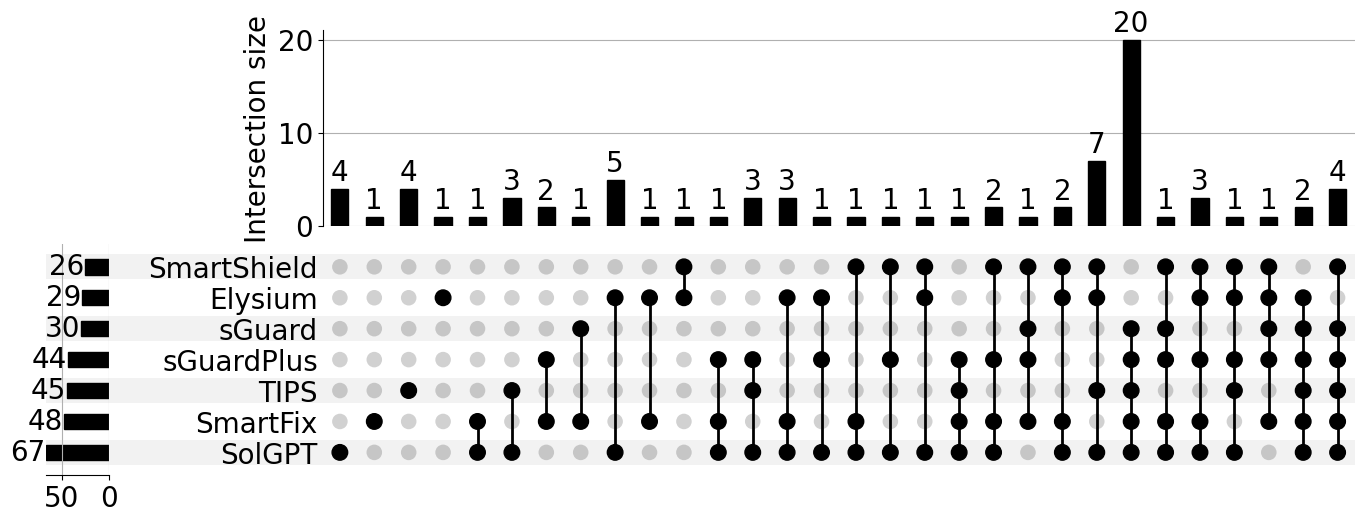

In [144]:
#Overlap for mitigation

left_list=tools#+['No Mitigation']
df=pd.read_csv(os.path.join(results_path,'smartbugs/data_analysis','mitigated_exploits_contract_per_tool.csv'))
df=df.drop(['Total'], axis=1)
df['Name']=df['Contract'].apply(lambda x: x.split('/')[1])
df['Category']=df['Contract'].apply(lambda x: x.split('/')[0])
#df['No Mitigation'] = df[left_list[:-1]].apply(lambda row: all(row == False), axis=1)
df.drop(['Contract'], axis=1, inplace=True)
# Create a dictionary to hold the sets for each tool
tool_sets = {tool: set(df[df[tool] == True].apply(lambda x: (x['Name'], x['Category']), axis=1)) for tool in left_list}

# Prepare the data in a format suitable for the venn package
data = {}
for tool, contract_set in tool_sets.items():
    data[tool] = {f"{contract}-{category}" for contract, category in contract_set}
    
# OVERLAP FOR MITIGATION
from matplotlib import pyplot as plt

from upsetplot import from_contents, plot
plot(from_contents(data), show_counts="{:,}")
#plt.suptitle("Intersection of Exploits mitigated")
plt.savefig("../results/smartbugs/data_analysis/plots/rq3_upset.pdf")
plt.show()